In [5]:
data =c(12.2,38.9,75.4,69.0,158.0,161.7,119.9,140.9,89.4,134.9,68.8,158.7,
      119.2,31.9,14.9,13.5,181.5,120.3,133.0,107.6,137.7,134.6,86.3,87.5, 
      98.9,43.8,32.4,114.3,204.7,178.0,124.0,157.7,101.0,139.0,83.6,44.6,
      39.6,91.7,22.7,64.6,143.5,192.8,152.4,129.4,119.4,144.5,104.2,135.0,
49.7,72.9,45.6,81.7,147.9,123.9,111.6,107.6,97.9,93.7,75.1,67.6)


In [6]:
print(data)

 [1]  12.2  38.9  75.4  69.0 158.0 161.7 119.9 140.9  89.4 134.9  68.8 158.7
[13] 119.2  31.9  14.9  13.5 181.5 120.3 133.0 107.6 137.7 134.6  86.3  87.5
[25]  98.9  43.8  32.4 114.3 204.7 178.0 124.0 157.7 101.0 139.0  83.6  44.6
[37]  39.6  91.7  22.7  64.6 143.5 192.8 152.4 129.4 119.4 144.5 104.2 135.0
[49]  49.7  72.9  45.6  81.7 147.9 123.9 111.6 107.6  97.9  93.7  75.1  67.6


In [7]:
ts.nosunnyhours = ts(data, frequency = 12, start = c(2013, 1))

In [8]:
ts.nosunnyhours

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2013,12.2,38.9,75.4,69.0,158.0,161.7,119.9,140.9,89.4,134.9,68.8,158.7
2014,119.2,31.9,14.9,13.5,181.5,120.3,133.0,107.6,137.7,134.6,86.3,87.5
2015,98.9,43.8,32.4,114.3,204.7,178.0,124.0,157.7,101.0,139.0,83.6,44.6
2016,39.6,91.7,22.7,64.6,143.5,192.8,152.4,129.4,119.4,144.5,104.2,135.0
2017,49.7,72.9,45.6,81.7,147.9,123.9,111.6,107.6,97.9,93.7,75.1,67.6


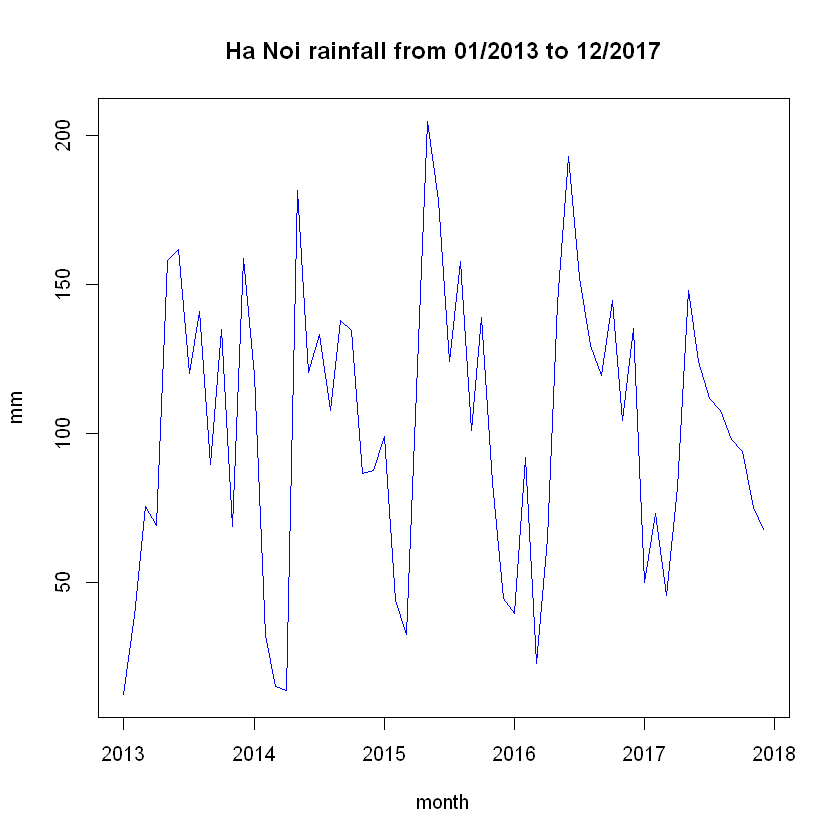

In [9]:
plot.ts(ts.nosunnyhours, main='Ha Noi nosunnyhours from 01/2013 to 12/2017',
       ylab='mm',xlab='month',col='blue')

## Remarks:
- We can see that the highest volume of rain almost in summer, lowest in winter.

In [10]:
# use log to optimization
HWES.forecast = HoltWinters(log(ts.nosunnyhours))

In [11]:
HWES.forecast

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = log(ts.rainfall))

Smoothing parameters:
 alpha: 0.2226797
 beta : 0
 gamma: 0.8322618

Coefficients:
           [,1]
a    4.09972980
b   -0.02186668
s1  -0.50165997
s2  -0.04751143
s3  -0.72633246
s4  -0.08473686
s5   0.59414180
s6   0.56282978
s7   0.46526646
s8   0.43975576
s9   0.34653751
s10  0.40106389
s11  0.16810644
s12  0.12920912

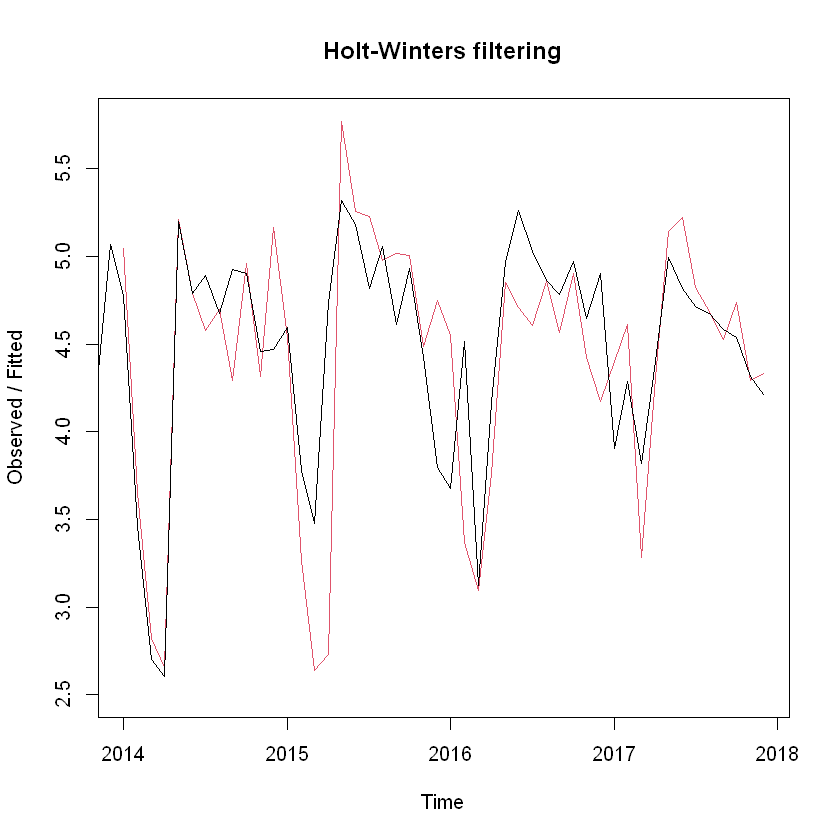

In [12]:
plot(HWES.forecast)

In [17]:
HWES.forecast.new = forecast:::forecast.HoltWinters(HWES.forecast, h = 6)
HWES.forecast.new

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2018       3.576203 2.935782 4.216625 2.596763 4.555643
Feb 2018       4.008485 3.352377 4.664593 3.005055 5.011915
Mar 2018       3.307797 2.636370 3.979224 2.280938 4.334656
Apr 2018       3.927526 3.241121 4.613931 2.877761 4.977292
May 2018       4.584538 3.883475 5.285601 3.512355 5.656721
Jun 2018       4.531359 3.815939 5.246780 3.437219 5.625500

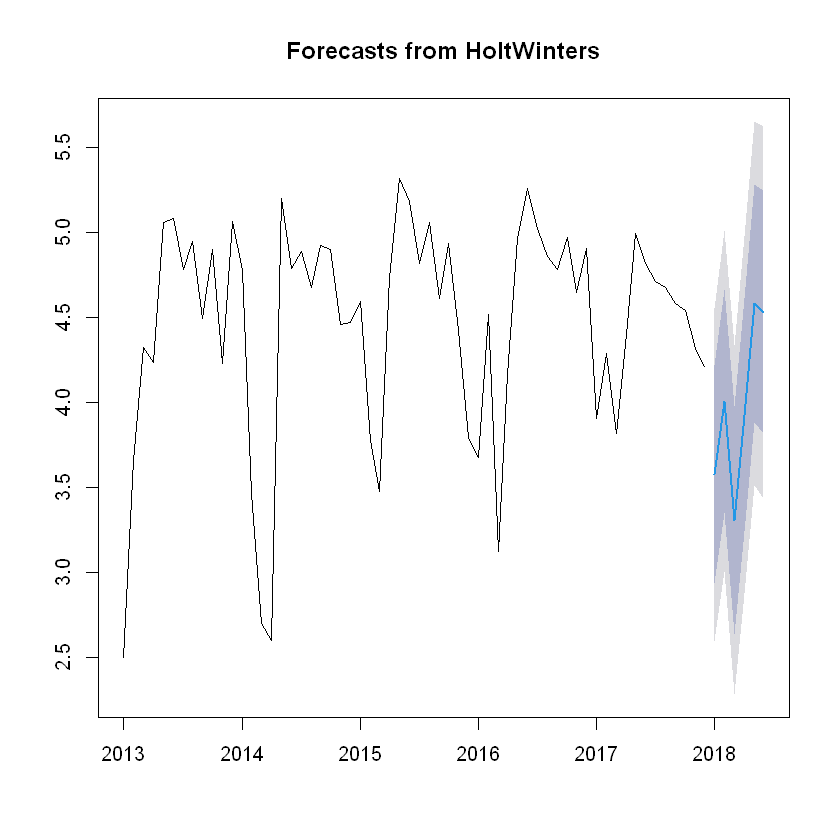

In [18]:
plot(HWES.forecast.new)

- The chart draw prediction in blue line, confident range 80 ~ 95% in grey

In [19]:
x = data.frame(HWES.forecast.new)

In [20]:
x

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Jan 2018,3.576203,2.935782,4.216625,2.596763,4.555643
Feb 2018,4.008485,3.352377,4.664593,3.005055,5.011915
Mar 2018,3.307797,2.636370,3.979224,2.280938,4.334656
Apr 2018,3.927526,3.241121,4.613931,2.877761,4.977292
May 2018,4.584538,3.883475,5.285601,3.512355,5.656721
Jun 2018,4.531359,3.815939,5.246780,3.437219,5.625500
